# Curriculum Learning

In [1]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import pickle
import config
import torch
from tqdm.notebook import tqdm
from copy import copy, deepcopy
import cmath
import chess
from utils import saver, loader

from agents import *
from environments import *
from models import *
%matplotlib inline

np.set_printoptions(precision = 3)

print("PyTorch version:", torch.__version__)  
print("CUDA toolkit version PyTorch was built with:", torch.version.cuda)  
print("cuDNN version:", torch.backends.cudnn.version()) 
print("cuda available:", torch.cuda.is_available())

torch.set_float32_matmul_precision('high')

PyTorch version: 2.7.1+cu128
CUDA toolkit version PyTorch was built with: 12.8
cuDNN version: 90701
cuda available: True


In [2]:
torch.manual_seed(42)
random.seed(42)
logger = Logger(sample_freq = 1000)

agent = Agent(board_logic = BoardLogic(), conv=True)
print(sum(p.numel() for p in agent.online_net1.parameters() if p.requires_grad))

opt_list = [None, None]


model = Model(agent = agent,
               environment = Environment(max_num_moves=200,),
               mem_capacity = 500000,
               batch_size = 512,
               num_warmup = 50000,
               policy_update = 2,
               target_update = 5000,
               temp_constants = (0.5, 0.1, 0.00, 5000),
               opt_list=opt_list,
               scaler=torch.amp.GradScaler("cuda")
             )

optimizer_grouped_parameters1 = group_decay_parameters(
    agent.online_net1,
    weight_decay=1e-5,
    no_decay=["bias", "GroupNorm.weight"],
    )

optimizer_grouped_parameters2 = group_decay_parameters(
    agent.online_net2,
    weight_decay=1e-5,
    no_decay=["bias", "GroupNorm.weight"],
    )

opt_list[0] = torch.optim.AdamW(optimizer_grouped_parameters1, lr=1e-4)
opt_list[1] = torch.optim.AdamW(optimizer_grouped_parameters2, lr=1e-4)


2389452


In [3]:
model.train(num_episodes = 5000, logger = logger)
save_checkpoint(model, filename="model_conv_5000_episodes.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

1 checkmate! 102 eps: 0.320, diff: 0.858
0
2 checkmate! 29 eps: 0.265, diff: 1.165
3 draw! 199 eps: 0.294, diff: 0.973
4 checkmate! 40 eps: 0.074, diff: 0.989
5 checkmate! 75 eps: 0.389, diff: 1.067
6 draw! 199 eps: 0.151, diff: 1.199
7 draw! 199 eps: 0.304, diff: 1.033
8 checkmate! 84 eps: 0.474, diff: 1.051
9 draw! 199 eps: 0.409, diff: 0.993
10 checkmate! 140 eps: 0.159, diff: 1.069
11 checkmate! 71 eps: 0.275, diff: 0.858
12 checkmate! 73 eps: 0.430, diff: 1.053
13 draw! 199 eps: 0.387, diff: 1.037
14 draw! 199 eps: 0.118, diff: 0.908
15 checkmate! 64 eps: 0.158, diff: 1.037
16 checkmate! 144 eps: 0.013, diff: 1.137
17 draw! 199 eps: 0.083, diff: 1.010
18 draw! 199 eps: 0.042, diff: 1.137
19 checkmate! 20 eps: 0.308, diff: nan
20 draw! 199 eps: 0.015, diff: 1.137
21 checkmate! 57 eps: 0.338, diff: 1.191
22 checkmate! 58 eps: 0.044, diff: 1.137
23 checkmate! 58 eps: 0.229, diff: 0.941
24 draw! 199 eps: 0.165, diff: 0.978
25 draw! 199 eps: 0.394, diff: 1.022
26 checkmate! 91 eps: 0.2

In [163]:
model = load_checkpoint("model_conv_15000_episodes.pth", model)
model.train(num_episodes = 5000, logger = logger)
save_checkpoint(model, filename="model_conv_20000_episodes.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

15001 draw! 199 eps: 0.033, diff: 0.438
tensor(0.0083, device='cuda:0')
15002 checkmate! 126 eps: 0.020, diff: 0.193
15003 checkmate! 79 eps: 0.084, diff: 0.414
15004 checkmate! 42 eps: 0.073, diff: 0.310
15005 checkmate! 18 eps: 0.052, diff: 0.310
15006 draw! 199 eps: 0.054, diff: 0.537
15007 checkmate! 58 eps: 0.043, diff: 0.180
15008 draw! 199 eps: 0.062, diff: 0.242
15009 checkmate! 113 eps: 0.098, diff: 0.247
15010 checkmate! 50 eps: 0.048, diff: 0.422
15011 draw! 102 eps: 0.058, diff: 0.349
15012 draw! 199 eps: 0.047, diff: 0.576
15013 checkmate! 73 eps: 0.063, diff: 0.448
15014 checkmate! 65 eps: 0.086, diff: 1.744
15015 draw! 199 eps: 0.054, diff: 1.299
15016 checkmate! 62 eps: 0.097, diff: 0.167
15017 checkmate! 80 eps: 0.082, diff: 0.251
15018 checkmate! 43 eps: 0.008, diff: 1.369
15019 checkmate! 130 eps: 0.063, diff: 0.808
15020 checkmate! 31 eps: 0.015, diff: 0.942
15021 checkmate! 48 eps: 0.019, diff: 0.133
15022 checkmate! 28 eps: 0.048, diff: 0.142
15023 checkmate! 123 

In [3]:
model = load_checkpoint("model_conv_20000_episodes.pth", model)
model.train(num_episodes = 5000, logger = logger)
save_checkpoint(model, filename="model_conv_25000_episodes.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

/home/kristian/anaconda3/envs/env_pytorch/lib/python3.12/site-packages/torch/_dynamo/variables/functions.py:1263: UserWarning: Dynamo does not know how to trace the builtin `<unknown module>.Random.random.` This function is either a Python builtin (e.g. _warnings.warn) or a third-party C/C++ Python extension (perhaps created with pybind).
If it is a Python builtin, please file an issue on GitHub so the PyTorch team can add support for it and see the next case for a workaround.
If it is a third-party C/C++ Python extension, please either wrap it into a PyTorch-understood custom operator (see https://pytorch.org/tutorials/advanced/custom_ops_landing_page.html for more details) or, if it is traceable, use `torch.compiler.allow_in_graph`.
  torch._dynamo.utils.warn_once(explanation + "\n" + "\n".join(hints))


20001 checkmate! 89 eps: 0.064, diff: 0.097
tensor(0.0078, device='cuda:0')
20002 checkmate! 108 eps: 0.013, diff: 0.347
20003 draw! 199 eps: 0.004, diff: 0.097
20004 draw! 199 eps: 0.045, diff: 0.181
20005 checkmate! 141 eps: 0.090, diff: 0.120
20006 checkmate! 110 eps: 0.001, diff: 0.314
20007 draw! 199 eps: 0.079, diff: 0.073
20008 checkmate! 98 eps: 0.083, diff: 0.142
20009 checkmate! 157 eps: 0.072, diff: 0.124
20010 draw! 199 eps: 0.028, diff: 0.740
20011 checkmate! 21 eps: 0.040, diff: 0.175
20012 checkmate! 19 eps: 0.100, diff: 0.175
20013 draw! 199 eps: 0.043, diff: 0.140
20014 checkmate! 112 eps: 0.078, diff: 0.212
20015 checkmate! 73 eps: 0.062, diff: 1.426
20016 checkmate! 73 eps: 0.014, diff: 0.154
20017 draw! 199 eps: 0.062, diff: 0.057
20018 draw! 199 eps: 0.048, diff: 0.141
20019 checkmate! 28 eps: 0.082, diff: 1.536
20020 checkmate! 42 eps: 0.072, diff: 0.169
20021 draw! 199 eps: 0.055, diff: 0.484
20022 checkmate! 21 eps: 0.057, diff: 0.756
20023 checkmate! 43 eps: 0.

KeyboardInterrupt: 

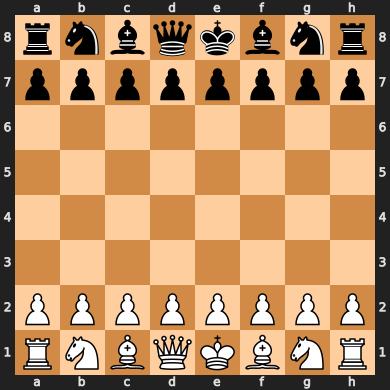

In [263]:
environment = Environment(max_num_moves=200,)
environment.reset()
#random.seed(42)
#np.random.seed(42)
#torch.manual_seed(42)

In [297]:
action = agent.select_action(environment, eps=0.1, greedy=False)
move = agent.action_to_move(action)

board, (reward, done) = environment.step(move)

state = agent.board_logic.board_to_state(board).to(config.device)

Q1 = agent.online_net1(state).detach()
Q2 = agent.online_net2(state).detach()
legal_moves = environment.get_legal_moves()
mask_legal = agent.get_mask_legal(legal_moves)

Q1_legal = Q1[mask_legal]
Q2_legal = Q2[mask_legal]

diff = torch.abs(Q1_legal - Q2_legal)/torch.max(torch.abs(Q1_legal), torch.abs(Q2_legal))

print(f"{np.mean(diff.cpu().numpy()):.4f}")

Q_legal = Q1.masked_fill(~mask_legal, -1e9)
action_star = torch.argmax(Q_legal, dim=1).to(config.device)
score = Q2[0,action_star[0]]

if environment.mirror:
    print("Black:")
    print(f"score: {score.item():.4f}")
    print(board.mirror())
else:
    print("White:")
    print(f"score: {score.item():.4f}")
    print(board)


if board.is_checkmate():
    print("checkmate!")

0.5988
White:
score: -0.1513
r n b . . . . .
. . p k . p p r
. p . . p n . q
p P . . . . . .
P . N . P . P p
. . . P . K . .
. . P . . N . P
R . . . . B . R


In [ ]:
model1 = load_checkpoint("model_conv_20000_episodes.pth", model)
agent1 = model1.agent

In [6]:
model2 = load_checkpoint("model_conv_15000_episodes.pth", model)
agent2 = model2.agent

In [7]:
environment = Environment(max_num_moves=200,)
eval_agents = EvaluateAgents(agent1, agent2, environment, num_games=1000)

results = eval_agents.evaluate()
print(results)

  0%|          | 0/1000 [00:00<?, ?it/s]

{1: 371, -1: 361, 0: 268}
